In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## EDA

0    549
1    342
Name: Survived, dtype: int64


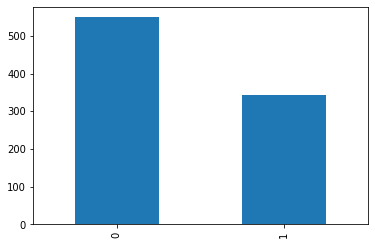

In [7]:
print(df_train['Survived'].value_counts())
df_train['Survived'].value_counts().plot.bar()

### Pclass - Survived

3    491
1    216
2    184
Name: Pclass, dtype: int64


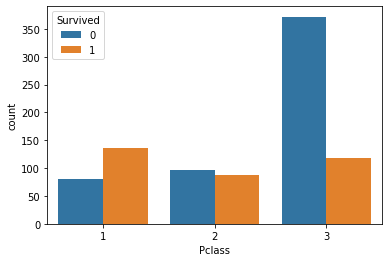

In [8]:
print(df_train['Pclass'].value_counts())
ax = sns.countplot(x='Pclass', hue='Survived', data = df_train)

### 피처 탐색 자동화 함수 valid_features()
1. 두 그룹 간의 분포를 비교하는 그래프를 출력
2. 두 그룹 각각의 표준편차 출력
3. 두 그룹간의 T-test 검정을 실시하여 출력
4. 두 그룹 각각에 Shapiro-wilk 검정을 실시하여 출력(정규분포에 얼마나 가까운지)

In [9]:
from scipy import stats

def valid_features(df, col_name, distribution_check = True):
    
    g = sns.FacetGrid(df, col = 'Survived')
    g.map(plt.hist, col_name, bins=30)
    
    titanic_survived = df[df['Survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['Survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var = False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" %tTestResultDiffVar)
    
    if distribution_check:
        print("The w-statistic and p-value in Survived %.3f and %.3f" %stats.shapiro(titanic_survived[col_name]))
        
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" %stats.shapiro(titanic_n_survived[col_name]))

## age - Survived

data std is 14.93
data std is 14.16
The t-statistic and p-value assuming equal variances is -2.067 and 0.039.
The t-statistic and p-value not assuming equal variances is -2.046 and 0.041
The w-statistic and p-value in Survived 0.983 and 0.001
The w-statistic and p-value in Non-Survived 0.969 and 0.000


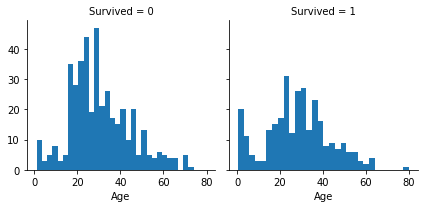

In [10]:
valid_features(df_train[df_train['Age'] > 0], 'Age', distribution_check=True)

두 그룹간의 평균이 비등비등하다.

## SibSp - Survived

data std is 0.71
data std is 1.29
The t-statistic and p-value assuming equal variances is -1.054 and 0.292.
The t-statistic and p-value not assuming equal variances is -1.194 and 0.233


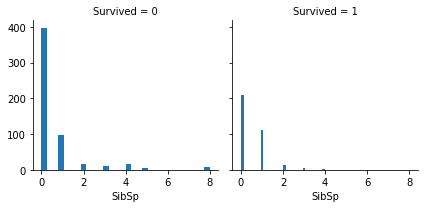

In [11]:
valid_features(df_train, 'SibSp', distribution_check=False)

두 그룹간의 평균 차이가 어느정도 존재

## Parch - Survived

data std is 0.77
data std is 0.82
The t-statistic and p-value assuming equal variances is 2.442 and 0.015.
The t-statistic and p-value not assuming equal variances is 2.479 and 0.013
The w-statistic and p-value in Survived 0.639 and 0.000
The w-statistic and p-value in Non-Survived 0.459 and 0.000


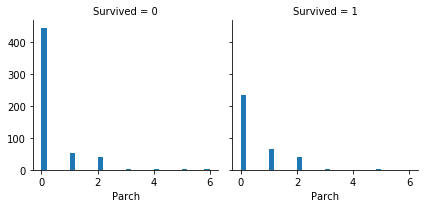

In [12]:
valid_features(df_train, 'Parch', distribution_check=True)

## fare - Survived

data std is 66.50
data std is 31.36
The t-statistic and p-value assuming equal variances is 7.939 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.839 and 0.000
The w-statistic and p-value in Survived 0.597 and 0.000
The w-statistic and p-value in Non-Survived 0.513 and 0.000


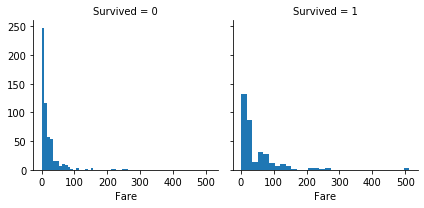

In [13]:
valid_features(df_train[df_train['Fare'].notnull()], 'Fare', distribution_check = True)

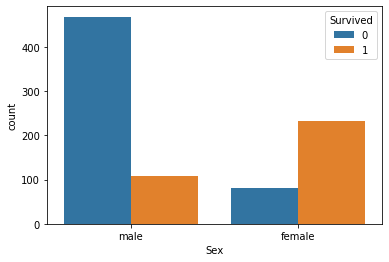

In [14]:
sns.countplot(x='Sex', hue='Survived', data=df_train)

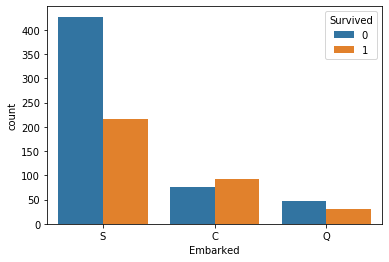

In [15]:
sns.countplot(x='Embarked', hue='Survived', data=df_train)

## Preprocessing

In [16]:
df_train.groupby(['Survived','Pclass','Sex'])['Age'].mean()

Survived  Pclass  Sex   
0         1       female    25.666667
                  male      44.581967
          2       female    36.000000
                  male      33.369048
          3       female    23.818182
                  male      27.255814
1         1       female    34.939024
                  male      36.248000
          2       female    28.080882
                  male      16.022000
          3       female    19.329787
                  male      22.274211
Name: Age, dtype: float64

In [17]:
df_train['Age'].fillna(df_train.groupby(['Survived','Pclass','Sex'])['Age'].transform('mean'), inplace = True)
df_test['Age'].fillna(df_train.groupby(['Survived','Pclass','Sex'])['Age'].transform('mean'), inplace = True)

In [18]:
embarked_mode = df_train['Embarked'].mode()
df_train['Embarked'].fillna(embarked_mode.values[0], inplace=True)
df_test['Embarked'].fillna(embarked_mode.values[0], inplace= True)

In [19]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)

In [20]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

## 원핫 인코딩

In [22]:
whole_df = df_train.append(df_test)
train_idx_num = df_train.shape[0]

whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,1,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,0,0,1


## 로지스틱 회귀

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score


def get_clf_eval(y_test, pred = None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    # ROC-AUC print 추가
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [25]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)

In [26]:
get_clf_eval(y_test, pred, pred_proba[:,1])

오차행렬
[[96 14]
 [18 51]]
정확도: 0.8212, 정밀도: 0.7846, 재현율: 0.7391, F1: 0.7612, AUC:0.8713


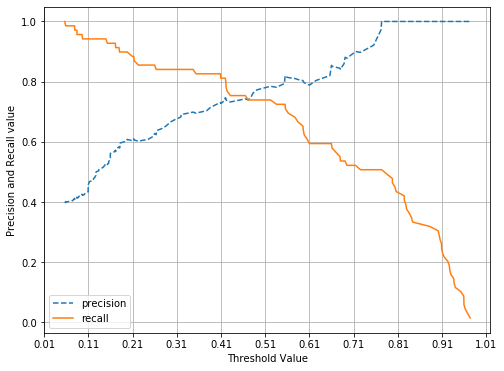

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold Value"); plt.ylabel("Precision and Recall value")
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, pred_proba[:, 1])

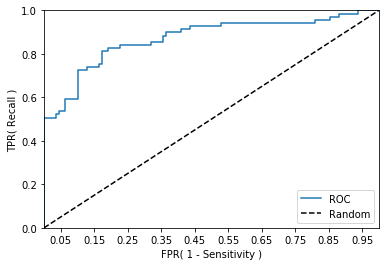

In [28]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test, pred_proba_c1):
    fprs , tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel("TPR( Recall )")
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

## Decision Tree

오차행렬
[[99 11]
 [23 46]]
정확도: 0.8101, 정밀도: 0.8070, 재현율: 0.6667, F1: 0.7302, AUC:0.7884
None


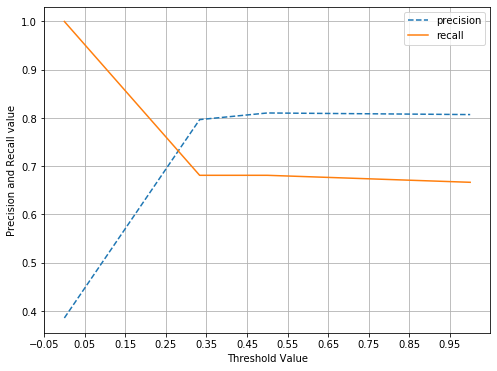

None
None


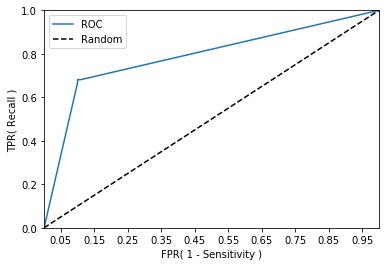

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)

print(get_clf_eval(y_test, pred, pred_proba[:,1]))
print(precision_recall_curve_plot(y_test, pred_proba[:, 1]))
print(roc_curve_plot(y_test, pred_proba[:,1]))

## 피처엔지니어링

In [30]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

df_train.drop(['PassengerId', 'Ticket'], axis = 1)
df_test.drop(['PassengerId', 'Ticket'], axis=1)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [31]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
df_train['Age'].fillna(df_train.groupby(['Survived','Pclass','Sex'])['Age'].transform('mean'), inplace = True)
df_test['Age'].fillna(df_train.groupby(['Survived','Pclass','Sex'])['Age'].transform('mean'), inplace = True)

In [34]:
replace_embarked = df_train['Embarked'].mode()

df_train['Embarked'].fillna(replace_embarked[0], inplace=True)

In [35]:
whole_df = df_train.append(df_test)
train_idx_num = df_train.shape[0]

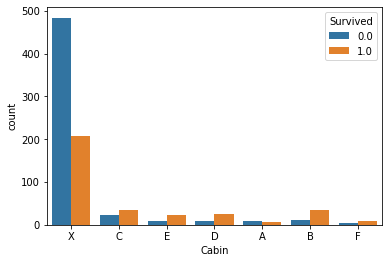

In [36]:
whole_df['Cabin'] = whole_df['Cabin'].fillna('X')

whole_df['Cabin'] = whole_df['Cabin'].apply(lambda x:x[0])

whole_df['Cabin'] = whole_df['Cabin'].replace({'G':'X', 'T':'X'})

ax = sns.countplot(x='Cabin', hue='Survived', data = whole_df)
plt.show()

In [37]:
name_grade = whole_df['Name'].apply(lambda x: x.split(", ", 1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona']


In [38]:
grade_dict = {"A" : ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'],
             "B" : ['Ms', 'Mme', 'Mrs', 'Dona'],
             'C' : ['Jonkheer', 'the Countess'],
             'D' : ['Mr', 'Don'],
             'E' : ['Master'],
             'F' : ['Miss', 'Mlle', ' Lady']}

def give_grade(x):
    grade = x.split(", ",1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

whole_df['Name'] = whole_df['Name'].apply(lambda x:give_grade(x))
print(whole_df['Name'].value_counts())

D    758
F    262
B    201
E     61
A     24
C      2
G      1
Name: Name, dtype: int64


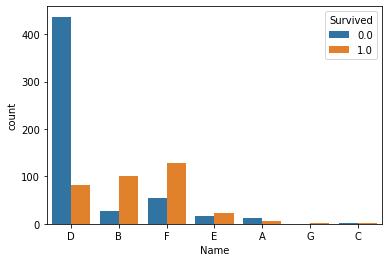

In [39]:
ax = sns.countplot(x='Name', hue='Survived', data = whole_df)
plt.show()

In [40]:
whole_df['Name'] = whole_df['Name'].replace({"G":"B"})

In [48]:
whole_df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

## 원-핫 인코딩

In [49]:
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_A,Name_B,Name_C,Name_D,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1.0,1,38.0,1,0,71.2833,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [93]:
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

## 로지스틱 모델 학습/평가

오차행렬
[[94 16]
 [16 53]]
정확도: 0.8212, 정밀도: 0.7681, 재현율: 0.7681, F1: 0.7681, AUC:0.8768
None


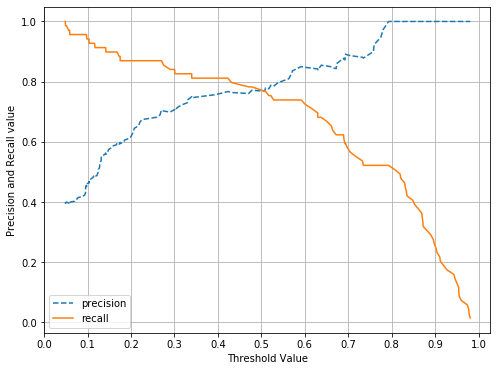

None
None


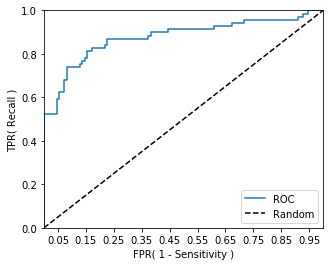

In [94]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)

print(get_clf_eval(y_test, pred, pred_proba[:, 1]))
print(precision_recall_curve_plot(y_test, pred_proba[:, 1]))
print(roc_curve_plot(y_test, pred_proba[:,1]))

## 피처의 중요도

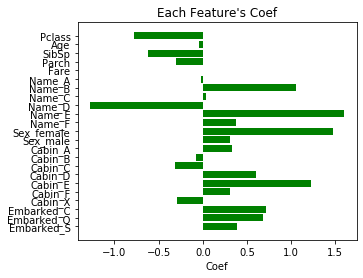

In [52]:
cols = df_train.columns.tolist()
cols.remove('Survived')
y_pos = np.arange(len(cols))

plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align='center', color = 'green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")

plt.show()

## 평가 : 모델 검증

모델의 과적합 여부 검증

In [53]:
from sklearn.model_selection import StratifiedKFold


lr = LogisticRegression(random_state = 0)

skfold = StratifiedKFold(n_splits=5)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정화도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print("\n## 교차 검증별 정확도:", np.round(cv_accuracy, 4))
print('\n## 평균 검증 정확도:{0}'.format(np.mean(cv_accuracy)))


1 교차 검증 정화도 :0.8324, 학습 데이터 크기: 712, 검증 데이터 크기: 179
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 172 183 184 186 187 190 192 193 194 195 198]

2 교차 검증 정화도 :0.8315, 학습 데이터 크기: 713, 검증 데이터 크기: 178
#2 검증 세트 인덱스:[168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213

In [56]:
feature_data = df_train.drop('Survived', axis=1)
label = df_train['Survived']

In [57]:
df_test.drop('Survived', axis=1, inplace=True)

In [58]:
lr.fit(feature_data, label)

LogisticRegression(random_state=0)

In [64]:
fare = whole_df['Fare'].mean()

In [65]:
df_test['Fare'] = df_test['Fare'].fillna(fare)

In [66]:
pred = lr.predict(df_test)

In [67]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Name_A,Name_B,Name_C,Name_D,Name_E,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,0,0,7.8292,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,3,47.000000,1,0,7.0000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,62.000000,0,0,9.6875,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,3,27.000000,0,0,8.6625,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,3,22.000000,1,1,12.2875,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,33.369048,0,0,8.0500,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
414,1,39.000000,0,0,108.9000,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
415,3,38.500000,0,0,7.2500,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
416,3,28.080882,0,0,8.0500,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [68]:
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [76]:
sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

In [77]:
sub

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [78]:
sub['Survived'] = pred

In [79]:
sub.to_csv("submission0728.csv")

## 로지스틱 Pclass 도 One-hot

In [121]:
whole_df_ohe = pd.get_dummies(whole_df, columns = ['Pclass', 'Name', 'Sex','Cabin', 'Embarked'])

In [122]:
whole_df_ohe

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Name_A,Name_B,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.000000,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,38.000000,1,0,71.2833,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1.0,26.000000,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,35.000000,1,0,53.1000,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.0,35.000000,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,33.369048,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
414,NaN,39.000000,0,0,108.9000,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
415,NaN,38.500000,0,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
416,NaN,28.080882,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [123]:
df_train = whole_df_ohe[:train_idx_num]
df_test = whole_df_ohe[train_idx_num:]

In [124]:
df_train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Name_A,Name_B,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.000000,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,38.000000,1,0,71.2833,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1.0,26.000000,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,35.000000,1,0,53.1000,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.0,35.000000,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.000000,0,0,13.0000,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
887,1.0,19.000000,0,0,30.0000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
888,0.0,23.818182,1,2,23.4500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
889,1.0,26.000000,0,0,30.0000,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [125]:
X_features = df_train.drop('Survived', axis=1)
y_label = df_train['Survived']

In [126]:
df_test.drop('Survived', axis=1, inplace=True)

In [127]:
whole_df['Fare'] = whole_df['Fare'].fillna(whole_df['Fare'].mean())

In [129]:
lr.fit(X_features, y_label)

pred = lr.predict(df_test)

In [130]:
sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

In [131]:
sub['Survived'] = pred

In [132]:
sub.to_csv("sub2_0728.csv")

## Family Size넣어보기.

In [135]:
whole_df['Family_size'] = whole_df['SibSp'] + whole_df['Parch']

whole_df.drop(['SibSp', 'Parch'], axis=1 ,inplace=True)

In [136]:
whole_df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family_size
0,0.0,3,D,male,22.000000,7.2500,X,S,1
1,1.0,1,B,female,38.000000,71.2833,C,C,1
2,1.0,3,F,female,26.000000,7.9250,X,S,0
3,1.0,1,B,female,35.000000,53.1000,C,S,1
4,0.0,3,D,male,35.000000,8.0500,X,S,0
...,...,...,...,...,...,...,...,...,...
413,NaN,3,D,male,33.369048,8.0500,X,S,0
414,NaN,1,B,female,39.000000,108.9000,C,C,0
415,NaN,3,D,male,38.500000,7.2500,X,S,0
416,NaN,3,D,male,28.080882,8.0500,X,S,0


In [138]:
whole_df_ohe = pd.get_dummies(whole_df)

In [139]:
whole_df_ohe

,Survived,Pclass,Age,Fare,Family_size,Name_A,Name_B,Name_C,Name_D,Name_E,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.000000,7.2500,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,1,38.000000,71.2833,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1.0,3,26.000000,7.9250,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,1,35.000000,53.1000,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.0,3,35.000000,8.0500,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,33.369048,8.0500,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
414,NaN,1,39.000000,108.9000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
415,NaN,3,38.500000,7.2500,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
416,NaN,3,28.080882,8.0500,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [140]:
df_train = whole_df_ohe[:train_idx_num]
df_test = whole_df_ohe[train_idx_num:]

In [141]:
X_features = df_train.drop('Survived', axis=1)
y_label = df_train['Survived']
df_test = df_test.drop("Survived", axis=1)

In [293]:
lr.fit(X_features, y_label)

pred = lr.predict(df_test)

In [295]:
lr_pred_proba = lr.predict_proba(df_test)

In [143]:
sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

In [144]:
sub['Survived'] = pred

In [145]:
sub.to_csv("sub3_0728.csv")

## Pclass 까지 ohe

In [146]:
whole_df_ohe = pd.get_dummies(whole_df, columns = ['Pclass', 'Name', 'Sex','Cabin', 'Embarked'])

df_train = whole_df_ohe[:train_idx_num]
df_test = whole_df_ohe[train_idx_num:]

X_features = df_train.drop('Survived', axis=1)
y_label = df_train['Survived']

df_test.drop('Survived', axis=1, inplace=True)

In [147]:
lr.fit(X_features, y_label)

pred = lr.predict(df_test)

sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = pred

In [148]:
sub.to_csv("sub4_0728.csv")

## Random Forest Let's get it

In [296]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [317]:
whole_df_ohe = pd.get_dummies(whole_df)

df_train = whole_df_ohe[:train_idx_num]
df_test = whole_df_ohe[train_idx_num:]

X_features = df_train.drop('Survived', axis=1)
y_label = df_train['Survived']

df_test.drop('Survived', axis=1, inplace=True)

In [318]:
rf.fit(X_features, y_label)

pred = rf.predict(df_test)
pred = np.round(pred)
sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = pred

In [319]:
sub.to_csv("sub5_0728.csv")

## 하이퍼 파라미터 튜닝

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=0)

In [163]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 300, 500, 1000],
    'max_depth' : [6, 8, 10, 12, 15, 18],
    'min_samples_leaf' : [4, 8, 12, 18, 20],
    'min_samples_split' : [4, 8, 12, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터:\n", grid_cv.best_params_)
print("최고 예측 정확도: {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 300}
최고 예측 정확도: 0.8385


In [193]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=8, min_samples_leaf = 4, min_samples_split= 12)

rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
pred_proba = rf_clf1.predict_proba(X_test)

get_clf_eval(y_test, pred,pred_proba[:,1])

오차행렬
[[101   9]
 [ 18  51]]
정확도: 0.8492, 정밀도: 0.8500, 재현율: 0.7391, F1: 0.7907, AUC:0.9111


In [194]:
rf_clf1.fit(X_features, y_label)

pred = rf_clf1.predict(df_test)

sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = pred

In [195]:
sub.to_csv("sub6_0728.csv")

In [170]:
len(svm_pred), len(X_test)

(179, 179)

In [171]:
from sklearn import svm

svm_clf = svm.SVC(kernel='rbf', C=4, gamma=0.1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, svm_pred)))

예측 정확도: 0.7877


In [190]:
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)
KNN_pred = KNN_clf.predict(X_test)

KNN_pred_proba = KNN_clf.predict_proba(X_test)

get_clf_eval(y_test, KNN_pred,KNN_pred_proba[:,1])

오차행렬
[[98 12]
 [26 43]]
정확도: 0.7877, 정밀도: 0.7818, 재현율: 0.6232, F1: 0.6935, AUC:0.7941


In [188]:
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_pred_proba = NB_clf.predict_proba(X_test)

get_clf_eval(y_test, NB_pred,NB_pred_proba[:,1])

오차행렬
[[93 17]
 [18 51]]
정확도: 0.8045, 정밀도: 0.7500, 재현율: 0.7391, F1: 0.7445, AUC:0.8765


In [ ]:
r

In [180]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))

예측 정확도: 0.7765


In [196]:
NB_clf.fit(X_features, y_label)

pred = NB_clf.predict(df_test)

sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = pred

In [197]:
sub.to_csv("sub7_0728.csv")

In [275]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=300, max_depth=8, min_samples_leaf = 4, min_samples_split= 12)
rf_reg.fit(X_train,y_train)
pred = rf_reg.predict(X_test)
pred = [1 if x >= 0.35 else 0 for x in pred]
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.8659


In [276]:
rf_reg.fit(X_features, y_label)

pred = rf_reg.predict(df_test)

sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = pred

In [206]:
sub.to_csv("sub8_0728.csv")

In [277]:
sub.to_csv("sub4_0729.csv")

## GBM

In [207]:
from sklearn.ensemble import GradientBoostingClassifier
import time



start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도: {0:.4f}".format(gb_accuracy))
print("GBM 수행 시간: {0:.4f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.8547
GBM 수행 시간: 0.0940 초 


In [210]:
gb_clf.fit(X_features, y_label)

pred = gb_clf.predict(df_test)

sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = pred

In [211]:
sub.to_csv("sub1_0729.csv")

## XGBoost

In [212]:
import xgboost as xgb
from xgboost import plot_importance


In [213]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [225]:
params = {"max_depth":3,
         'eta' : 0.05,
         'objective':'binary:logistic',
         'eval_metric':'auc',
         'early_stoppings':100}

num_rounds = 400

In [226]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-auc:0.863576	eval-auc:0.860343
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 100 rounds.
[1]	train-auc:0.865015	eval-auc:0.871014
[2]	train-auc:0.868466	eval-auc:0.876416
[3]	train-auc:0.868057	eval-auc:0.876416
[4]	train-auc:0.868616	eval-auc:0.876943
[5]	train-auc:0.871887	eval-auc:0.890119
[6]	train-auc:0.876659	eval-auc:0.890909
[7]	train-auc:0.87696	eval-auc:0.891304
[8]	train-auc:0.878587	eval-auc:0.891436
[9]	train-auc:0.878725	eval-auc:0.890777
[10]	train-auc:0.878599	eval-auc:0.8917
[11]	train-auc:0.878053	eval-auc:0.888274
[12]	train-auc:0.889075	eval-auc:0.899144
[13]	train-auc:0.889676	eval-auc:0.900329
[14]	train-auc:0.892884	eval-auc:0.900395
[15]	train-auc:0.892559	eval-auc:0.902767
[16]	train-auc:0.893327	eval-auc:0.901318
[17]	train-auc:0.893702	eval-auc:0.899078
[18]	train-auc:0.894645	eval-auc:0.903228
[19]	train-auc:0.894991	eval-auc:0.902437
[20]	train-auc:0.89515	eval-auc

[191]	train-auc:0.947337	eval-auc:0.925494
[192]	train-auc:0.947763	eval-auc:0.925099
[193]	train-auc:0.947963	eval-auc:0.925362
[194]	train-auc:0.948388	eval-auc:0.925362
[195]	train-auc:0.948472	eval-auc:0.925099
[196]	train-auc:0.948547	eval-auc:0.925626
[197]	train-auc:0.949106	eval-auc:0.925889
[198]	train-auc:0.949148	eval-auc:0.925889
[199]	train-auc:0.949561	eval-auc:0.926416
[200]	train-auc:0.949594	eval-auc:0.925626
[201]	train-auc:0.949928	eval-auc:0.925758
[202]	train-auc:0.95002	eval-auc:0.925889
[203]	train-auc:0.950353	eval-auc:0.926285
[204]	train-auc:0.950412	eval-auc:0.926285
[205]	train-auc:0.950599	eval-auc:0.92668
[206]	train-auc:0.950875	eval-auc:0.926153
[207]	train-auc:0.950917	eval-auc:0.926021
[208]	train-auc:0.950958	eval-auc:0.926021
[209]	train-auc:0.950983	eval-auc:0.926021
[210]	train-auc:0.950933	eval-auc:0.926548
[211]	train-auc:0.951284	eval-auc:0.926021
[212]	train-auc:0.951342	eval-auc:0.926021
[213]	train-auc:0.951467	eval-auc:0.926285
[214]	train-a

In [227]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

[0.039 0.038 0.058 0.991 0.311 0.481 0.88  0.859 0.473 0.962]
예측값 10개만 표시: [0, 0, 0, 1, 0, 0, 1, 1, 0, 1]


In [228]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[103   7]
 [ 17  52]]
정확도: 0.8659, 정밀도: 0.8814, 재현율: 0.7536, F1: 0.8125, AUC:0.9274


In [250]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, max_depth = 4)
evals = [(X_test, y_test)]

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set = evals, verbose = True)

ws100_preds = xgb_clf.predict(X_test)
ws100_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-auc:0.897628
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.894598
[2]	validation_0-auc:0.895982
[3]	validation_0-auc:0.894005
[4]	validation_0-auc:0.901383
[5]	validation_0-auc:0.899934
[6]	validation_0-auc:0.902042
[7]	validation_0-auc:0.900593
[8]	validation_0-auc:0.902569
[9]	validation_0-auc:0.900527
[10]	validation_0-auc:0.902899
[11]	validation_0-auc:0.900329
[12]	validation_0-auc:0.899605
[13]	validation_0-auc:0.899407
[14]	validation_0-auc:0.902372
[15]	validation_0-auc:0.904018
[16]	validation_0-auc:0.907312
[17]	validation_0-auc:0.908893
[18]	validation_0-auc:0.909947
[19]	validation_0-auc:0.90942
[20]	validation_0-auc:0.911528
[21]	validation_0-auc:0.911133
[22]	validation_0-auc:0.911924
[23]	validation_0-auc:0.913175
[24]	validation_0-auc:0.917128
[25]	validation_0-auc:0.917194
[26]	validation_0-auc:0.916271
[27]	validation_0-auc:0.915547
[28]	validation_0-auc:0.916996
[29]	validation_0-auc:0.91502
[30]	validation_0

In [251]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[103   7]
 [ 23  46]]
정확도: 0.8324, 정밀도: 0.8679, 재현율: 0.6667, F1: 0.7541, AUC:0.9277


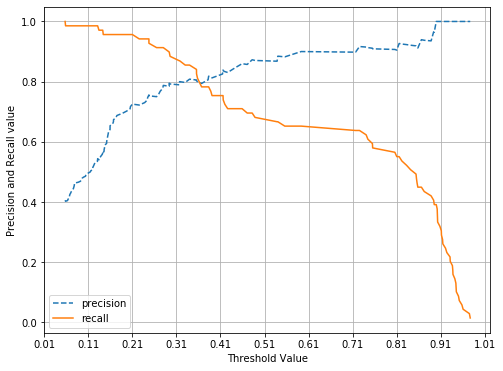

None


In [252]:
print(precision_recall_curve_plot(y_test, ws100_pred_proba))


In [253]:
thresholds = np.arange(0.3, 0.65, 0.05)
thresholds = list(thresholds)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)

get_eval_by_threshold(y_test, ws100_pred_proba.reshape(-1,1), thresholds)

임곗값: 0.3
오차행렬
[[94 16]
 [ 9 60]]
정확도: 0.8603, 정밀도: 0.7895, 재현율: 0.8696, F1: 0.8276, AUC:0.9277
임곗값: 0.35
오차행렬
[[96 14]
 [11 58]]
정확도: 0.8603, 정밀도: 0.8056, 재현율: 0.8406, F1: 0.8227, AUC:0.9277
임곗값: 0.39999999999999997
오차행렬
[[99 11]
 [17 52]]
정확도: 0.8436, 정밀도: 0.8254, 재현율: 0.7536, F1: 0.7879, AUC:0.9277
임곗값: 0.44999999999999996
오차행렬
[[102   8]
 [ 20  49]]
정확도: 0.8436, 정밀도: 0.8596, 재현율: 0.7101, F1: 0.7778, AUC:0.9277
임곗값: 0.49999999999999994
오차행렬
[[103   7]
 [ 23  46]]
정확도: 0.8324, 정밀도: 0.8679, 재현율: 0.6667, F1: 0.7541, AUC:0.9277
임곗값: 0.5499999999999999
오차행렬
[[104   6]
 [ 24  45]]
정확도: 0.8324, 정밀도: 0.8824, 재현율: 0.6522, F1: 0.7500, AUC:0.9277
임곗값: 0.5999999999999999
오차행렬
[[105   5]
 [ 25  44]]
정확도: 0.8324, 정밀도: 0.8980, 재현율: 0.6377, F1: 0.7458, AUC:0.9277


In [279]:
xgb_clf.fit(X_features, y_label)

pred = xgb_clf.predict(df_test)
pred_proba = xgb_clf.predict_proba(df_test)

sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = pred

In [280]:
sub.to_csv("sub5_0729.csv")

In [256]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.35

pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custome_predict = binarizer.transform(pred_proba_1)

In [257]:
custome_predict

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [258]:
sub['Survived'] = custome_predict

In [259]:
sub.to_csv("sub3_0729.csv")

## GBM Regressor

In [284]:
from xgboost import plot_importance
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators = 500, learning_rate = 0.05, max_depth = 4)
xgb_reg.fit(X_features, y_label)

pred = xgb_reg.predict(df_test)

pred = np.round(pred)

sub = pd.read_csv("data/sample_submission.csv", index_col='PassengerId')

sub['Survived'] = np.abs(pred)

[00:58:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [285]:
sub.to_csv("sub6_0729.csv")

In [305]:
len(pred)

418

In [303]:
len(lr_pred_proba[:,1])

418

In [312]:
mix_pred = 0.6*pred + 0.4 *lr_pred_proba[:,1]

In [314]:
sub['Survived'] = [1 if x >0.5 else 0 for x in mix_pred]

In [315]:
sub.to_csv("sub7_0729.csv")

In [322]:
sub['Survived'] = [1 if x==0 else 0 for x in sub['Survived']]

In [323]:
sub.to_csv("sub8_0729.csv")

In [324]:
sub

,Survived
PassengerId,
892,1
893,1
894,0
895,0
896,1
...,...
1305,1
1306,0
1307,1
